In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv(r"C:\Users\samsung\Downloads\Tetuan City power consumption.csv")

In [4]:
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [5]:
df.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [6]:
df.drop(['DateTime', 'Zone 2  Power Consumption','Zone 3  Power Consumption'], axis=1, inplace=True)

In [7]:
sample_data = df.sample(frac=0.01)

In [8]:
sample_data

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
562,11.900,71.10,0.088,0.044,0.089,39293.16456
51906,15.700,59.48,0.081,435.800,198.300,32474.52471
9705,12.240,85.80,0.078,66.260,62.570,29645.61702
16268,16.250,75.20,0.085,0.015,0.126,32030.31216
49000,4.973,86.70,0.081,0.059,0.137,22637.26236
...,...,...,...,...,...,...
19778,19.860,73.40,4.922,365.700,350.300,29612.06557
4300,16.210,78.60,4.915,0.029,0.152,43230.37975
33641,25.750,47.52,4.926,743.000,62.990,39936.42619
36847,22.320,65.69,0.274,0.106,0.082,45856.99115


In [10]:
X = sample_data.iloc[:,0:5].values
y = sample_data['Zone 1 Power Consumption']

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
X

array([[1.190e+01, 7.110e+01, 8.800e-02, 4.400e-02, 8.900e-02],
       [1.570e+01, 5.948e+01, 8.100e-02, 4.358e+02, 1.983e+02],
       [1.224e+01, 8.580e+01, 7.800e-02, 6.626e+01, 6.257e+01],
       ...,
       [2.575e+01, 4.752e+01, 4.926e+00, 7.430e+02, 6.299e+01],
       [2.232e+01, 6.569e+01, 2.740e-01, 1.060e-01, 8.200e-02],
       [1.394e+01, 7.310e+01, 7.400e-02, 3.047e+02, 2.717e+02]])

In [12]:
y

562      39293.16456
51906    32474.52471
9705     29645.61702
16268    32030.31216
49000    22637.26236
            ...     
19778    29612.06557
4300     43230.37975
33641    39936.42619
36847    45856.99115
10873    34854.12766
Name: Zone 1 Power Consumption, Length: 524, dtype: float64

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(419, 5)
(105, 5)
(419,)
(105,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (5,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'softmax')) 

model.compile(optimizer = 'rmsprop', loss='mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [15]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
14/14 [==============================] - 2s 45ms/step - loss: 1111303040.0000 - mse: 1111303040.0000 - val_loss: 1098230912.0000 - val_mse: 1098230912.0000
Epoch 2/100
14/14 [==============================] - 0s 17ms/step - loss: 1111303040.0000 - mse: 1111303040.0000 - val_loss: 1098230912.0000 - val_mse: 1098230912.0000
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 1111303040.0000 - mse: 1111303040.0000 - val_loss: 1098230912.0000 - val_mse: 1098230912.0000
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 1111303040.0000 - mse: 1111303040.0000 - val_loss: 1098230912.0000 - val_mse: 1098230912.0000
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 1111303040.0000 - mse: 1111303040.0000 - val_loss: 1098230912.0000 - val_mse: 1098230912.0000
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 1111303296.0000 - mse: 1111303296.0000 - val_loss: 1098230912.0000 - val_mse: 109823091

Epoch 50/100
14/14 [==============================] - 0s 7ms/step - loss: 1111303040.0000 - mse: 1111303040.0000 - val_loss: 1098230912.0000 - val_mse: 1098230912.0000
Epoch 51/100
14/14 [==============================] - 0s 7ms/step - loss: 1111303168.0000 - mse: 1111303168.0000 - val_loss: 1098230912.0000 - val_mse: 1098230912.0000
Epoch 52/100
14/14 [==============================] - 0s 7ms/step - loss: 1111303040.0000 - mse: 1111303040.0000 - val_loss: 1098230912.0000 - val_mse: 1098230912.0000
Epoch 53/100
14/14 [==============================] - 0s 8ms/step - loss: 1111303168.0000 - mse: 1111303168.0000 - val_loss: 1098230912.0000 - val_mse: 1098230912.0000
Epoch 54/100
14/14 [==============================] - 0s 9ms/step - loss: 1111303168.0000 - mse: 1111303168.0000 - val_loss: 1098230912.0000 - val_mse: 1098230912.0000
Epoch 55/100
14/14 [==============================] - 0s 8ms/step - loss: 1111303040.0000 - mse: 1111303040.0000 - val_loss: 1098230912.0000 - val_mse: 10982309

Epoch 99/100
14/14 [==============================] - 0s 7ms/step - loss: 1111303168.0000 - mse: 1111303168.0000 - val_loss: 1098230912.0000 - val_mse: 1098230912.0000
Epoch 100/100
14/14 [==============================] - 0s 11ms/step - loss: 1111303168.0000 - mse: 1111303168.0000 - val_loss: 1098230912.0000 - val_mse: 1098230912.0000


In [16]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 9ms/step - loss: 1098230912.0000 - mse: 1098230912.0000


[1098230912.0, 1098230912.0]

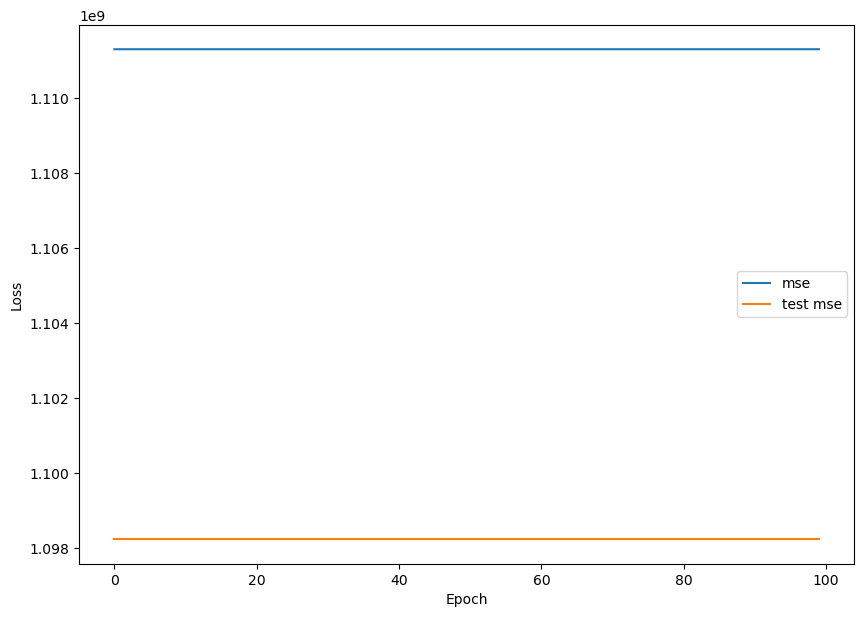

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()